# **Análise de vulnerabilidades por ferramentas de AppSec 👩‍💻**


#### Descricao do problema: analisar ferramentas de seguranca que detectam vulnerabilidades (SAST, DAST e SCA) em diversos projetos ao longo. Assim, sera analisado a quantidade de vulnerabilidades que cada uma trouxe, os tipos de vulnerabilidades e quantidade de vulnerabilidade encontrada nos projetos ao longo do tempo

#### Hipoteses: Qual ferramenta detecta mais vulnerabilidade? Qual vulnerabilidade mais ocorre nas aplicacoes? Qual app aumentou a quantidade de vulnerabilidade pelo tempo? Qual ferramenta demora mais para corrigir as vulnerabilidades?

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# importacao de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
import plotly.express as px #biblioteca para graficos com visual mais atraente

## Carga de Dataset

In [ ]:
# informa o arquivo XLSX de importacao para o dataset
file_xlsx = 'appsec_sample.xlsx'

# lê o arquivo na pasta raiz do projeto
dataset = pd.read_excel(file_xlsx)

# exibindo as primeiras linhas
dataset.head()

,critical_vuln,high_vuln,medium_vuln,dt_created,issues_list,tool,cd_month_start,id_vulnerability,scan_date
0,0.0,62,97,2022-12-01,"['CVE-2020-11988', 'Cxb3498186-093f', 'CVE-202...",SCA,2022-12-01,0,2023-06-15
1,0.0,6,2,2022-11-14,"['CVE-2022-3517', 'CVE-2022-23647', 'CVE-2022-...",SCA,2022-11-01,1,2023-06-15
2,NaN,0,1,2023-05-16,"['Client Privacy Violation', 'Client HTML5 Sto...",SAST,2023-05-01,2,2023-06-15
3,NaN,6,15,2023-05-15,"['Reflected XSS All Clients', 'Stored XSS', 'C...",SAST,2023-05-01,3,2023-06-15
4,NaN,147,216,2023-05-15,"['Reflected XSS All Clients', 'Stored XSS', 'C...",SAST,2023-05-01,4,2023-06-15


#### Os dados sao do tipo de modelo supervisionado. Podemos ver que conhecemos a entrada dos dados que são rotulados. Sabemos as características dele.
---
#### `critical_vuln` => quantidade de vulnerabilidades criticas
#### `high_vuln `=> quantidade de vulnerabilidades altas
#### `medium_vuln` => quantidade de vulnerabilidades medias
#### `dt_created` => vulnerabilidades detectadas nas ferramentas
#### `issues_list` =>  lista de vulnerabilidades detectadas nas ferramentas
#### `tool` => ferramenta utilizada para detectar vulnerabilidade
#### `cd_month_start` => mes que detectou vulnerabilidade
#### `id_vulnerability` => aplicacoes com vulnerabilidade identificadas por id
#### `scan_date` => scan realizado para coletar informacao das vulnerabilidades

### Tratamento de Missings

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

critical_vuln       675
high_vuln             0
medium_vuln           0
dt_created            0
issues_list           0
tool                  0
cd_month_start        0
id_vulnerability      0
scan_date             0
dtype: int64

#### É possível ver que na coluna `critical_vuln` possui vários NaN

<Axes: >

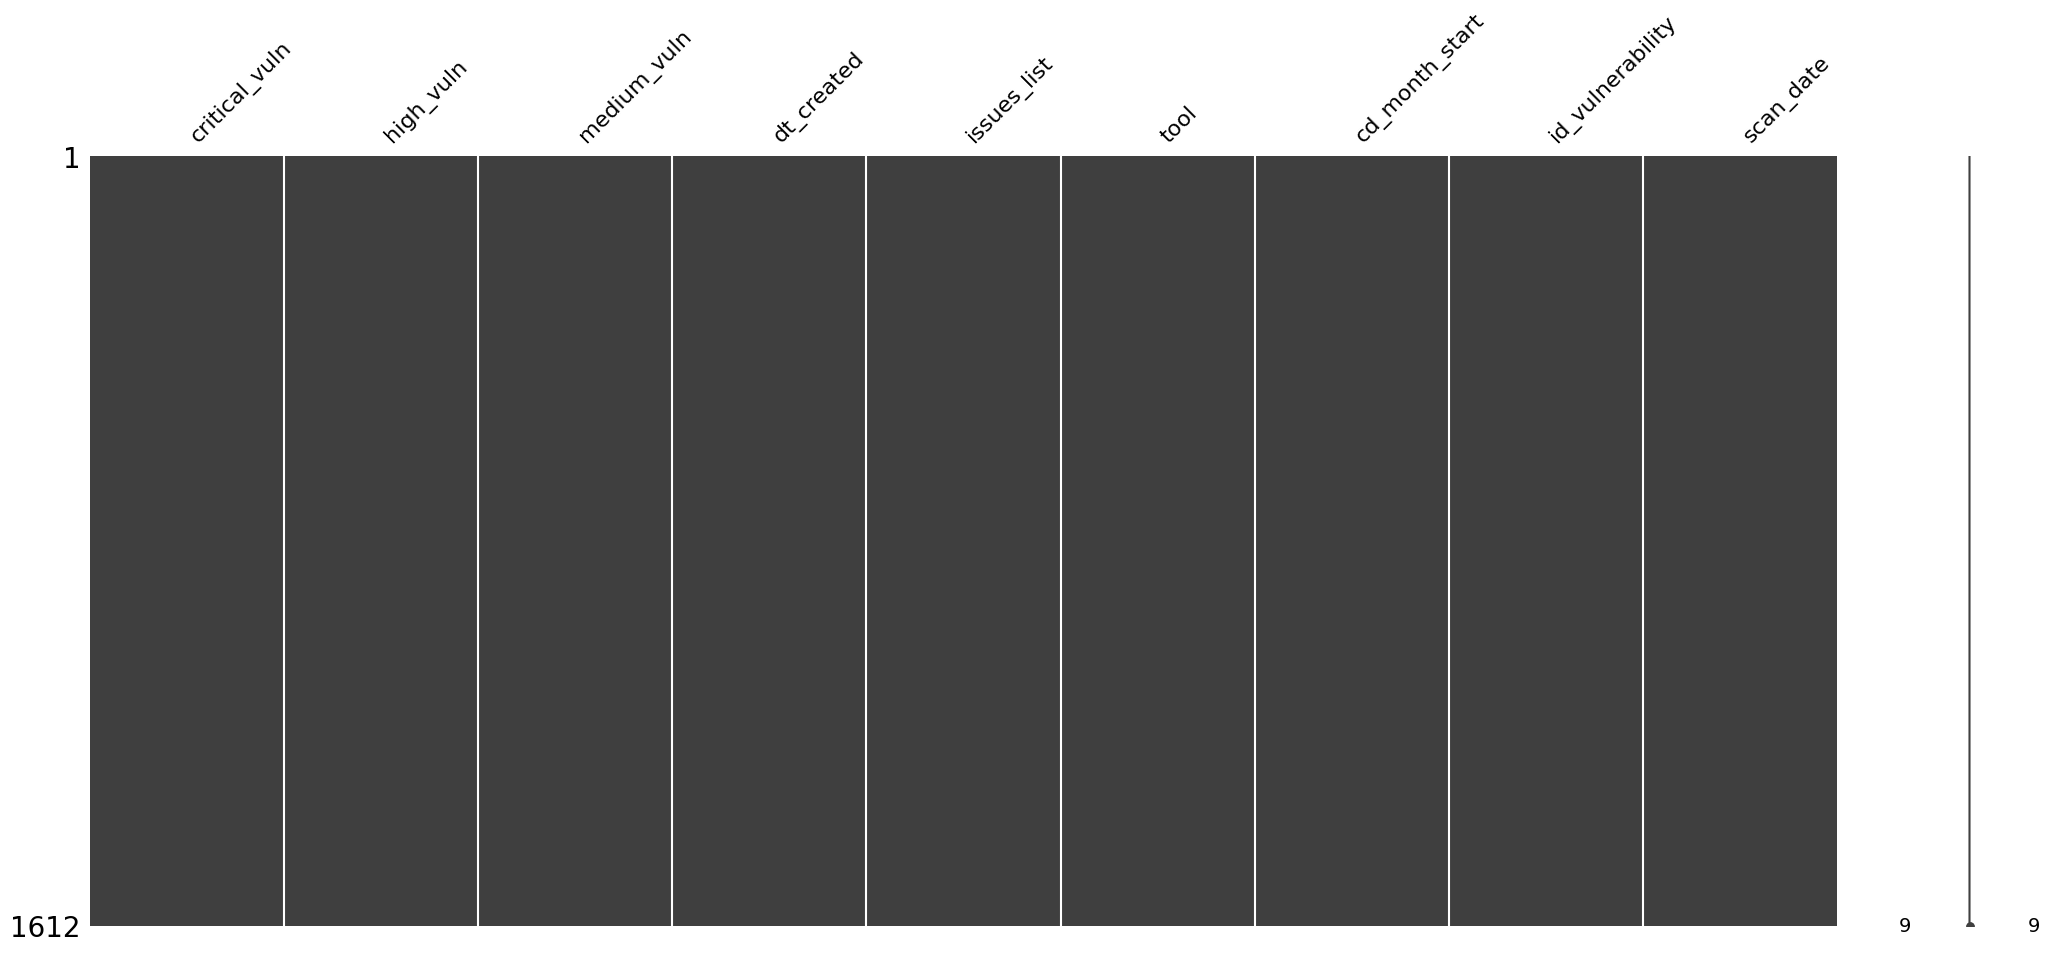

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo os NaN por 0
datasetSemMissings.replace(np.nan,0, inplace=True)

# exibindo visualizacao matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

#### No grafico acima, é possível ver que não há nenhum NaN (not a number) aparecendo, pois aonde existia esse valor, foi alterado por zero

In [ ]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

critical_vuln       0
high_vuln           0
medium_vuln         0
dt_created          0
issues_list         0
tool                0
cd_month_start      0
id_vulnerability    0
scan_date           0
dtype: int64

###Análise exploratória

In [ ]:
# mostra as informacoes do dataset
datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   critical_vuln     1612 non-null   float64       
 1   high_vuln         1612 non-null   int64         
 2   medium_vuln       1612 non-null   int64         
 3   dt_created        1612 non-null   datetime64[ns]
 4   issues_list       1612 non-null   object        
 5   tool              1612 non-null   object        
 6   cd_month_start    1612 non-null   datetime64[ns]
 7   id_vulnerability  1612 non-null   int64         
 8   scan_date         1612 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 113.5+ KB


In [ ]:
# mostra as 5 últimas linhas do dataset
datasetSemMissings.tail(5)

,critical_vuln,high_vuln,medium_vuln,dt_created,issues_list,tool,cd_month_start,id_vulnerability,scan_date
1607,0.0,0,1,2023-10-14,"['CookieNotMarkedAsSecure,SameSiteCookieNotImp...",DAST,2023-10-01,99,2023-10-23
1608,0.0,0,0,2023-10-14,"['MissingXFrameOptionsHeader,MissingXssProtect...",DAST,2023-10-01,100,2023-10-23
1609,0.0,0,4,2023-10-18,"['RedirectBodyTooLarge,IisVersionDisclosure,As...",DAST,2023-10-01,101,2023-10-23
1610,0.0,0,0,2023-10-15,"['MissingXFrameOptionsHeader,MissingXssProtect...",DAST,2023-10-01,102,2023-10-23
1611,10.0,10,9,2023-10-15,"['AutoCompleteEnabled,AutoCompleteEnabledPassw...",DAST,2023-10-01,103,2023-10-23


In [ ]:
# faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis) e formata com 2 casas decimais
datasetSemMissings.describe().applymap(lambda x: f"{x:0.2f}").drop('id_vulnerability', axis=1)

,critical_vuln,high_vuln,medium_vuln
count,1612.00,1612.00,1612.00
mean,0.10,22.32,42.76
std,0.99,132.86,233.84
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,1.00,5.00
75%,0.00,16.00,29.00
max,10.00,4488.00,8145.00


#### É possível ver que temos mais de 1000 dados coletados e que foi detectado mais vulnerabilidades do tipo média nas aplicacoes

##Quantidade de vulnerabilidade por ferramenta de segurança

In [ ]:
# cria dataframe temporario para analisar qual ferramenta detecta mais vulnerabilidades

df=datasetSemMissings.groupby('tool').sum().apply(lambda x: x.sort_values(ascending=True)).drop('id_vulnerability', axis=1)

# cria soma das colunas
col_list= ['high_vuln', 'critical_vuln', 'medium_vuln']
df['total'] = df[col_list].sum(axis=1)
df.sort_values('total',ascending=False)

,critical_vuln,high_vuln,medium_vuln,total
tool,,,,
SAST,0.0,20928,45798,66726.0
SCA,0.0,14871,22595,37466.0
DAST,160.0,181,541,882.0



#### Na tabela acima, é possível ver que o SAST tem mais vulnerabilidade que as demais ferramentas. Isso ocorre porque a ferramenta SAST estar no início da pipeline do ciclo de desenvolvimento do software seguro (SSDLC)

### Cálculo para calcular quantidade de vulnerabilidades x mês é corrigida

In [ ]:
# Criar coluna de data e ordenar por data e vuln

datasetSemMissings['Date'] = pd.to_datetime(datasetSemMissings['scan_date'])
datasetSemMissings['Month'] = datasetSemMissings['Date'].dt.month

datasetSemMissings = datasetSemMissings.sort_values(['id_vulnerability','Date'], ascending=False)


# criar lista com soma de vulnerabilidades
col_list= ['high_vuln', 'critical_vuln', 'medium_vuln']

# soma de vulnerabilidades
datasetSemMissings['total_vulns'] = datasetSemMissings[col_list].sum(axis=1)

# fazer a diferenca pelo id da vulnerabilidade e preencher com ultimo valor. se nao houver como fazer a diferença, utiliza o valor atual

datasetSemMissings['vulns_difference'] = (datasetSemMissings['total_vulns'].groupby(datasetSemMissings['id_vulnerability']).diff().fillna(datasetSemMissings['total_vulns']))


datasetSemMissings.head()

,critical_vuln,high_vuln,medium_vuln,dt_created,issues_list,tool,cd_month_start,id_vulnerability,scan_date,Date,Month,total_vulns,vulns_difference
955,0.0,2,5,2023-07-22,"['CVE-2022-25857', 'CVE-2022-38751', 'CVE-2022...",SCA,2023-07-01,222,2023-08-15,2023-08-15,8,7.0,7.0
954,0.0,26,16,2023-07-07,"['CVE-2021-23382', 'CVE-2021-23368', 'CVE-2022...",SCA,2023-07-01,221,2023-08-15,2023-08-15,8,42.0,42.0
953,0.0,15,13,2023-08-04,"['CVE-2023-20863', 'CVE-2016-1000027', 'CVE-20...",SCA,2023-08-01,220,2023-08-15,2023-08-15,8,28.0,28.0
1174,0.0,1,0,2022-11-22,['CVE-2023-30533'],SCA,2022-11-01,219,2023-09-05,2023-09-05,9,1.0,1.0
952,0.0,4,0,2023-08-08,"['Cxf6e7f2c1-dc59', 'Cxdca8e59f-8bfe', 'Cx8bc4...",SCA,2023-08-01,219,2023-08-15,2023-08-15,8,4.0,3.0


## Tipos de vulnerabilidade encontradas

In [ ]:
df_temp=datasetSemMissings
df_temp.issues_list=df_temp.issues_list.str.split()
df_vulns=df_temp.explode('issues_list')
df_vulns.issues_list=df_vulns.issues_list.str.replace("[","")
df_vulns.issues_list=df_vulns.issues_list.str.replace("]","")
df_vulns.head()


,critical_vuln,high_vuln,medium_vuln,dt_created,issues_list,tool,cd_month_start,id_vulnerability,scan_date,Date,Month,total_vulns,vulns_difference
955,0.0,2,5,2023-07-22,"'CVE-2022-25857',",SCA,2023-07-01,222,2023-08-15,2023-08-15,8,7.0,7.0
955,0.0,2,5,2023-07-22,"'CVE-2022-38751',",SCA,2023-07-01,222,2023-08-15,2023-08-15,8,7.0,7.0
955,0.0,2,5,2023-07-22,"'CVE-2022-1471',",SCA,2023-07-01,222,2023-08-15,2023-08-15,8,7.0,7.0
955,0.0,2,5,2023-07-22,"'CVE-2022-41854',",SCA,2023-07-01,222,2023-08-15,2023-08-15,8,7.0,7.0
955,0.0,2,5,2023-07-22,"'CVE-2022-38752',",SCA,2023-07-01,222,2023-08-15,2023-08-15,8,7.0,7.0


In [ ]:
df_vulns.sort_values('total_vulns',ascending=False).head()

,critical_vuln,high_vuln,medium_vuln,dt_created,issues_list,tool,cd_month_start,id_vulnerability,scan_date,Date,Month,total_vulns,vulns_difference
15,0.0,109,8145,2023-05-15,an,SAST,2023-05-01,15,2023-06-15,2023-06-15,6,8254.0,8033.0
15,0.0,109,8145,2023-05-15,'Heuristic,SAST,2023-05-01,15,2023-06-15,2023-06-15,6,8254.0,8033.0
15,0.0,109,8145,2023-05-15,Configuration,SAST,2023-05-01,15,2023-06-15,2023-06-15,6,8254.0,8033.0
15,0.0,109,8145,2023-05-15,in,SAST,2023-05-01,15,2023-06-15,2023-06-15,6,8254.0,8033.0
15,0.0,109,8145,2023-05-15,'Password,SAST,2023-05-01,15,2023-06-15,2023-06-15,6,8254.0,8033.0


## Top 20 vulnerabilidades encontradas

In [44]:
y = df_vulns.head(20).sort_values('total_vulns',ascending=False).total_vulns
fig = px.pie(df_vulns.head(20).sort_values('total_vulns',ascending=False), values=y, names='issues_list')
fig.show()

#### É possivel analisar que há 13 vulnerabilidades empatadas

### Top 20 vulnerabilides x ferramenta

In [64]:
y = df_vulns.head(20).sort_values('total_vulns',ascending=False).total_vulns
fig = px.bar(df_vulns.head(20).sort_values('total_vulns',ascending=False), x=df_vulns.head(20).sort_values('total_vulns',ascending=False).tool,y=y)
fig.show()

#### É possível ver que as top 20 vulnerabilidades que mais ocorrem sao da ferramenta de SCA

### Top 10 maiores vulnerabilidades SAST

In [41]:
df_vulns[df_vulns['tool']=='SAST'].groupby(['issues_list']).aggregate(np.sum).drop('critical_vuln', axis=1).drop('high_vuln', axis=1).drop('medium_vuln', axis=1).drop('Month', axis=1).drop('vulns_difference', axis=1).sort_values('total_vulns',ascending=False).head()


,id_vulnerability,total_vulns
issues_list,,
'Client,125741,474077.0
"Injection',",27336,229147.0
"XSS',",41727,200945.0
DOM,39879,185918.0
Of,81225,147884.0


### Top 10 maiores vulnerabilidades DAST

In [42]:
df_vulns[df_vulns['tool']=='DAST'].groupby(['issues_list']).aggregate(np.sum).apply(lambda x: x.sort_values(ascending=True)).drop('critical_vuln', axis=1).drop('high_vuln', axis=1).drop('medium_vuln', axis=1).drop('Month', axis=1).drop('vulns_difference', axis=1).sort_values('total_vulns',ascending=False).head(10)


,id_vulnerability,total_vulns
issues_list,,
"'AutoCompleteEnabled,AutoCompleteEnabledPasswordField,PasswordFormOverHttp,CookieNotMarkedAsHttpOnly,SameSiteCookieNotImplemented,CsrfDetected,MissingXFrameOptionsHeader,JqueryOutOfDate,ModernizrOutOfDate,MissingXssProtectionHeader,CspNotImplemented,ReferrerPolicyNotImplemented,LoginPageIdentified,SslCertificateHostnameMismatch,SslCertificateSignedByUntrustedRoot,ExpiredSslCertificate,WeakSignatureAlgorithmDetected,HstsNotEnabled,TlsVersion1Support,TlsVersion11Support,WeakCiphersDetected,HighchartsOutOfDate,ForbiddenResource,PossibleInternalWindowsPathLeakage,EmailDisclosure,JqueryUiAutocompleteOutOfDate,JqueryValidationOutOfDate,FileUploadFound,OpenSslOutOfDate,OpenSslVersionDisclosure,OpenSslIdentified,ReverseTabnabbing,SubResourceIntegrityNotImplemented,Xss,Xss,Xss,FrameInjection,Xss,Xss,MisconfiguredAccessControlOrigin,InternalServerError'",228,54.0
"'AutoCompleteEnabled,AutoCompleteEnabledPasswordField,PasswordFormOverHttp,CookieNotMarkedAsHttpOnly,SameSiteCookieNotImplemented,CsrfDetected,MissingXFrameOptionsHeader,JqueryOutOfDate,ModernizrOutOfDate,MissingXssProtectionHeader,CspNotImplemented,ReferrerPolicyNotImplemented,LoginPageIdentified,SslCertificateHostnameMismatch,SslCertificateSignedByUntrustedRoot,ExpiredSslCertificate,WeakSignatureAlgorithmDetected,TlsVersion1Support,TlsVersion11Support,WeakCiphersDetected,HstsNotEnabled,HighchartsOutOfDate,PossibleInternalWindowsPathLeakage,ForbiddenResource,EmailDisclosure,JqueryUiAutocompleteOutOfDate,JqueryValidationOutOfDate,FileUploadFound,OpenSslOutOfDate,ReverseTabnabbing,OpenSslVersionDisclosure,SubResourceIntegrityNotImplemented,OpenSslIdentified,Xss,Xss,Xss,Xss,FrameInjection,Xss,MisconfiguredAccessControlOrigin,Xss,Xss,Xss,InternalServerError'",116,30.0
"'AutoCompleteEnabled,AutoCompleteEnabledPasswordField,PasswordFormOverHttp,CookieNotMarkedAsHttpOnly,SameSiteCookieNotImplemented,CsrfDetected,MissingXFrameOptionsHeader,JqueryOutOfDate,ModernizrOutOfDate,MissingXssProtectionHeader,CspNotImplemented,ReferrerPolicyNotImplemented,LoginPageIdentified,SslCertificateHostnameMismatch,SslCertificateSignedByUntrustedRoot,ExpiredSslCertificate,WeakSignatureAlgorithmDetected,TlsVersion1Support,HstsNotEnabled,TlsVersion11Support,WeakCiphersDetected,ForbiddenResource,PossibleInternalWindowsPathLeakage,OpenSslOutOfDate,OpenSslVersionDisclosure,OpenSslIdentified,HighchartsOutOfDate,EmailDisclosure,JqueryUiAutocompleteOutOfDate,JqueryValidationOutOfDate,FileUploadFound,ReverseTabnabbing,SubResourceIntegrityNotImplemented,Xss,FrameInjection,Xss,MisconfiguredAccessControlOrigin,Xss,Xss,Xss,Xss,InternalServerError,Xss,BlindXss'",114,30.0
"'AutoCompleteEnabled,AutoCompleteEnabledPasswordField,PasswordFormOverHttp,CookieNotMarkedAsHttpOnly,SameSiteCookieNotImplemented,CsrfDetected,MissingXFrameOptionsHeader,JqueryOutOfDate,ModernizrOutOfDate,MissingXssProtectionHeader,CspNotImplemented,ReferrerPolicyNotImplemented,LoginPageIdentified,SslCertificateHostnameMismatch,SslCertificateSignedByUntrustedRoot,ExpiredSslCertificate,WeakSignatureAlgorithmDetected,TlsVersion1Support,HstsNotEnabled,TlsVersion11Support,WeakCiphersDetected,OpenSslOutOfDate,OpenSslVersionDisclosure,OpenSslIdentified,ForbiddenResource,PossibleInternalWindowsPathLeakage,HighchartsOutOfDate,EmailDisclosure,JqueryUiAutocompleteOutOfDate,JqueryValidationOutOfDate,FileUploadFound,ReverseTabnabbing,SubResourceIntegrityNotImplemented,Xss,FrameInjection,Xss,Xss,Xss,Xss,MisconfiguredAccessControlOrigin,Xss,Xss,InternalServerError'",103,29.0
"'CookieNotMarkedAsHttpOnly,SameSiteCookieNotImplemented,AutoCompleteEnabled,AutoCompleteEnabledPasswordField,PasswordFormOverHttp,CsrfDetected,MissingXFrameOptionsHeader,JqueryOutOfDate,ModernizrOutOfDate,MissingXssProtectionHeader,CspNotImplemented,ReferrerPolicyNotImplemented,LoginPageIdentified,SslCertificateHostnameMismatch,SslCertificateSignedByUntrustedRoot,TlsVersion1Support,ExpiredSslCertificate,TlsVersion11Support,WeakSignatureAlgorithmD

### Top 10 maiores vulnerabilidades SCA

In [47]:
df_vulns[df_vulns['tool']=='SCA'].groupby(['issues_list']).aggregate(np.sum).apply(lambda x: x.sort_values(ascending=True)).drop('critical_vuln', axis=1).drop('high_vuln', axis=1).drop('medium_vuln', axis=1).drop('Month', axis=1).drop('vulns_difference', axis=1).sort_values('total_vulns',ascending=False).head(10)


,id_vulnerability,total_vulns
issues_list,,
"'CVE-2023-20863',",23815,32649.0
"'CVE-2022-22971',",20486,31804.0
"'CVE-2022-22970',",20486,31804.0
"'CVE-2023-20861',",22135,31316.0
"'CVE-2022-22968',",20164,31264.0
"'CVE-2016-1000027',",22957,30905.0
"'CVE-2022-22950',",19176,30863.0
"'CVE-2022-42003',",19070,30787.0
"'CVE-2021-22096',",18507,30514.0


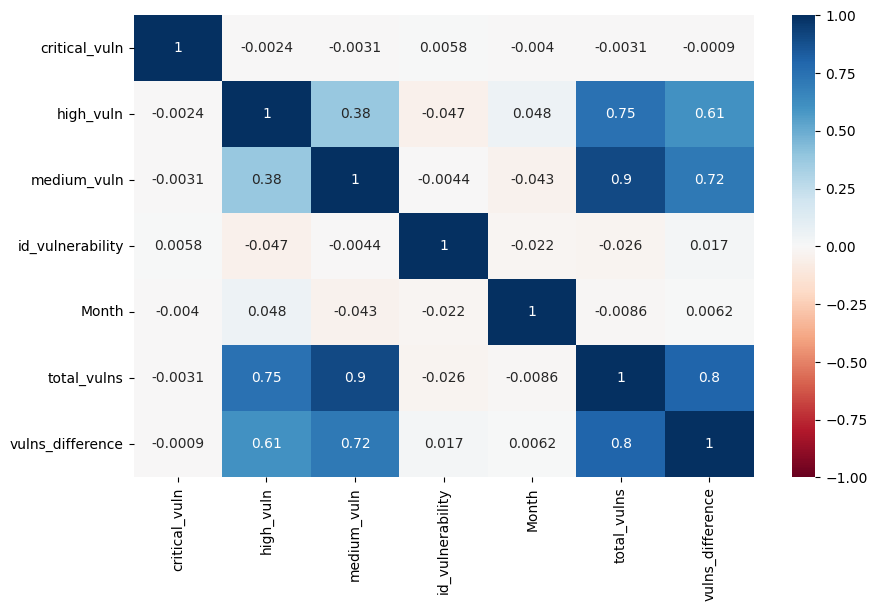

In [ ]:
# matriz de correlacão com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(df_vulns.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

#### É possível ver que há uma alta correlaçao entre total_vulns e medium_vuln justamente porque a quantidade maior de vulnerabilidade vem das vulnerabilidades médias como vimos anteriormente

###Vulnerabilidades pelo tempo

In [ ]:
x = df_vulns.scan_date
y = df_vulns.total_vulns
fig = px.line(df_vulns, x, y,color='id_vulnerability')
fig.show()

#### É possível ver que há uma grande correcao de vulnerabilidade na app de id 12 em junho. Enquanto que na app 176 houve um grande aumento de vulnerabilidade em outubro de forma geral, sem saber a ferramenta usada

###Vulnerabilidades x tempo x ferramenta SAST

In [ ]:
x = datasetSemMissings[datasetSemMissings['tool']=='SAST'].cd_month_start
y = datasetSemMissings[datasetSemMissings['tool']=='SAST'].total_vulns
fig = px.line(datasetSemMissings[datasetSemMissings['tool']=='SAST'], x, y,color='id_vulnerability')
fig.show()

#### É possível ver que há uma grande correcao de vulnerabilidade na app de id 162 em junho. Enquanto que na app 46 houve um grande aumento de vulnerabilidade em outubro na ferramenta SAST

###Vulnerabilidades x tempo x ferramenta DAST

In [ ]:
x = datasetSemMissings[datasetSemMissings['tool']=='DAST'].cd_month_start
y = datasetSemMissings[datasetSemMissings['tool']=='DAST'].total_vulns
fig = px.line(datasetSemMissings[datasetSemMissings['tool']=='DAST'], x, y,color='id_vulnerability')
fig.show()

#### É possível ver que há uma grande correcao de vulnerabilidade na app de id 92 em novembro de 2022, na ferramenta de DAST.

###Vulnerabilidades x tempo x ferramenta SCA

In [ ]:
x = datasetSemMissings[datasetSemMissings['tool']=='SCA'].cd_month_start
y = datasetSemMissings[datasetSemMissings['tool']=='SCA'].total_vulns
fig = px.line(datasetSemMissings[datasetSemMissings['tool']=='SCA'], x, y,color='id_vulnerability')
fig.show()

#### Enquanto na ferramenta de SCA vemos que é dificil ocorrer um padrao de diminuicao de vulnerabilidade. Isso pode ocorrer por ser mais dificil de corrigir por serem bibliotecas vulneraveis e que nao ocorre uma aletracao no codigo, como nas demais ferramentas que detectam vulnerabilidade no codigo ou interface da aplicacao

# **Análise Gerencial**


### Apps com mais vulnerabilidades no mês atual

In [ ]:
datasetSemMissings[datasetSemMissings['Month']==datasetSemMissings['Month'].max()].groupby('total_vulns').aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False)).tail().drop('Month', axis=1).drop('vulns_difference', axis=1)


,critical_vuln,high_vuln,medium_vuln,id_vulnerability
total_vulns,,,,
856.0,0.0,348,508,176
946.0,0.0,696,250,11
1040.0,0.0,7,1033,123
1180.0,0.0,936,244,11
7094.0,0.0,4488,2606,46


### Apps com menos vulnerabilidades no mês atual

In [ ]:
datasetSemMissings[datasetSemMissings['Month']==datasetSemMissings['Month'].max()].groupby('total_vulns').aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False)).head().drop('Month', axis=1).drop('vulns_difference', axis=1)


,critical_vuln,high_vuln,medium_vuln,id_vulnerability
total_vulns,,,,
0.0,0.0,0,0,7777
1.0,0.0,11,19,2658
2.0,0.0,10,26,1915
3.0,0.0,7,8,478
4.0,0.0,4,28,744


### Apps com maior quantidade de correçoes

In [ ]:
datasetSemMissings.groupby('vulns_difference').aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False)).head().drop('total_vulns', axis=1).drop('Month', axis=1).drop('medium_vuln', axis=1).drop('high_vuln', axis=1).drop('critical_vuln', axis=1)


,id_vulnerability
vulns_difference,
-7054.0,46
-871.0,125
-868.0,123
-863.0,178
-861.0,168


### Apps com maior e menor quantidade de correçoes

In [ ]:
datasetSemMissings.groupby('vulns_difference').aggregate(np.sum).apply(lambda x: x.sort_values(ascending=False)).tail().drop('total_vulns', axis=1).drop('Month', axis=1).drop('medium_vuln', axis=1).drop('high_vuln', axis=1).drop('critical_vuln', axis=1)


,id_vulnerability
vulns_difference,
1040.0,123
1162.0,162
1354.0,12
7094.0,46
8033.0,15


#### Assim, é possivel saber quais equipes/aplicacoes estao seguindo a cultura de desenvolvimento seguro e como estao essas metricas por mês para que o time de seguranca possa ajudar de maneira mais eficaz essas aplicacoes